# Import package


In [94]:
# install numpy
# install pandas
# install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning data (Làm sạch dữ liệu)

In [95]:
data_frame_test = pd.read_csv("test.csv")
data_frame_train = pd.read_csv("train.csv")
data_frame = pd.concat([data_frame_test,data_frame_train])
data_frame.apply(pd.isnull).sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

# Data Visualization (Trực quan hóa dữ liệu)

### Customer type and Personal travel impact on Satisfaction

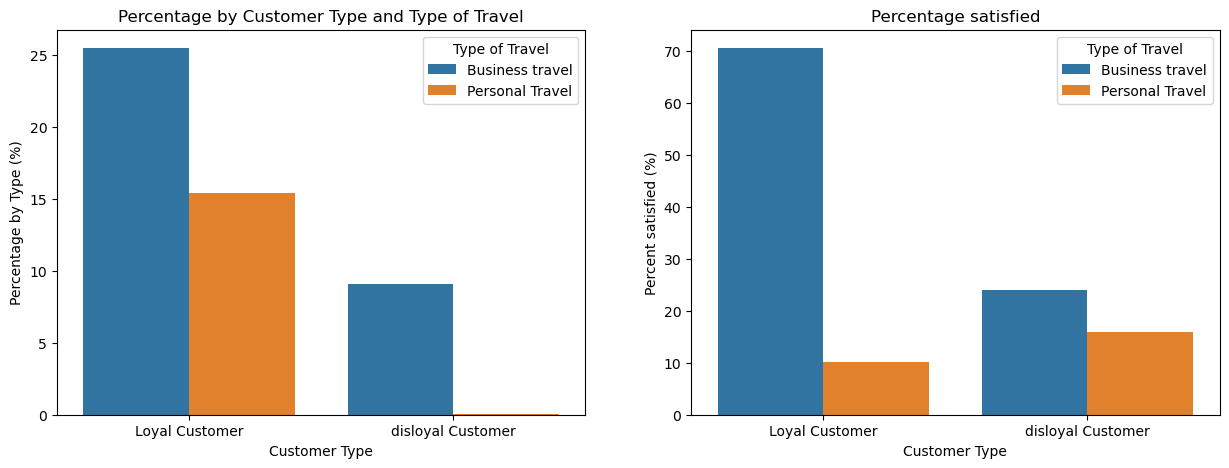

In [96]:
data_frame_copy_1 = data_frame.copy()
# satisfied = 1, neutral or dissatisfied = 0
data_frame_copy_1['satisfaction'] = data_frame_copy_1['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
# tạo bảng bằng crosstab 
df_crosstab = pd.crosstab(
    index=[data_frame_copy_1['Customer Type'], data_frame_copy_1['Type of Travel']], 
    columns=data_frame_copy_1['satisfaction'],  
    margins=True,  
    margins_name="Tong"  
)
df_crosstab
total_count = df_crosstab.iloc[-1, -1]
percent = df_crosstab.div(total_count) * 100
percent = percent.sort_index().drop(index="Tong")
percent = percent.drop(columns="Tong")
percent_reset = percent.reset_index()
percent_long = percent_reset.melt(  id_vars=["Customer Type", "Type of Travel"],
                                    value_vars=[0, 1],
                                    var_name="satisfaction", 
                                    value_name="Percentage by Type (%)")
percent_long = percent_long.drop(columns='satisfaction')
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.barplot(x="Customer Type", y="Percentage by Type (%)", hue="Type of Travel", data=percent_long, errorbar=None, edgecolor=None, ax=ax1)
ax1.set_title("Percentage by Customer Type and Type of Travel")
ax1.set_ylabel("Percentage by Type (%)")
data_frame_copy_1["satisfaction"] *= 100
sns.barplot(x="Customer Type", y="satisfaction", hue="Type of Travel", data=data_frame_copy_1, errorbar=None, edgecolor=None, ax=ax2)
ax2.set_title("Percentage satisfied")
ax2.set_ylabel("Percent satisfied (%)");

### Service impact on satisfaction

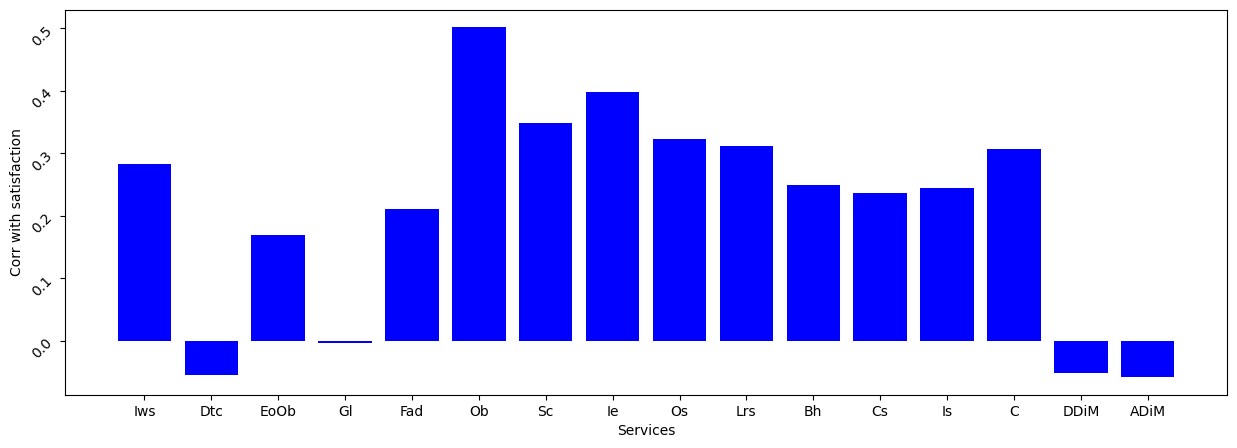

In [97]:
data_frame_copy_2 = data_frame.copy()
data_frame_copy_2['satisfaction'] = data_frame_copy_2['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
columns = list(data_frame.columns)[8:25]
data_col = data_frame_copy_2[columns].copy()
matrix = data_col.corr()
satisfaction_matrix = matrix['satisfaction'].drop('satisfaction')
ar_index = []
for i in satisfaction_matrix.index:
    a = i.split(' ')
    s = ''
    for j in a:
        s += j[0]
    ar_index.append(s)
ar_index
fig,ax = plt.subplots(figsize= (15,5))
ax.bar(ar_index , satisfaction_matrix.values, color = 'blue')
plt.xlabel('Services')
plt.ylabel('Corr with satisfaction')
plt.yticks(rotation = 45)
plt.show()

In [98]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score
data_frame_copy_2 = data_frame_copy_2.fillna(0)
X_train = data_frame_copy_2.drop(columns=['satisfaction']).iloc[:70000, 8:23]
y_train = data_frame_copy_2['satisfaction'].iloc[:70000]
X_test = data_frame_copy_2.drop(columns=['satisfaction']).iloc[70000:, 8:23]
y_test = data_frame_copy_2['satisfaction'].iloc[70000:]
model = LogisticRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
score = model.score(X_test,y_test)
mse = mean_squared_error(y_pre , y_test)
score
accuracy = accuracy_score(y_test, y_pre)
pre = recall_score(y_test, y_pre)
pre


c:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7787837575286575